# DIAMOND PRICE PREDICTION 💎

## INDEX

 1. IMPORTING LIBRARIES

 2. LOADING DATA

 3. DATA PREPROCESSING

 4. MODEL BUILDING

 5. CONCLUSION

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

### FEATURE DESCRIPTION

#### Price

price (in US dollars)This is the target column containing tags for the features.

#### Carat (0.2--5.01)

The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

#### Cut (Fair, Good, Very Good, Premium, Ideal)

In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

#### Color, from J (worst) to D (best)

The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

#### Clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

#### Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

#### Depth

Depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

#### Table width of the top of the diamond relative to widest point (43--95)


A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

In [2]:
disc=pd.DataFrame({"DESCRIPTION":['Diamond weight in carat','Diamond cutting quality','Diamond color from J (worst) to D (best)','A measure of diamond clarity (from worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)','Diamond length in mm','Diamond width in mm','Diamond depth in mm','Percentage depth that is equal to z / mean(x, y)','The width of the widest point at the top of the diamond','Diamond price (target variable)'],
                                  'COLUMN':['carat','cut','color','clarity','x','y','z','depth','table','price']})
disc         
#A brief discription of the columns in a table format

,DESCRIPTION,COLUMN
0,Diamond weight in carat,carat
1,Diamond cutting quality,cut
2,Diamond color from J (worst) to D (best),color
3,A measure of diamond clarity (from worst to be...,clarity
4,Diamond length in mm,x
5,Diamond width in mm,y
6,Diamond depth in mm,z
7,"Percentage depth that is equal to z / mean(x, y)",depth
8,The width of the widest point at the top of th...,table
9,Diamond price (target variable),price


## LOADING DATA

In [136]:
df=pd.read_csv("diamonds.csv") #IMPORTING THE DATASET
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True) #dropped/omitted an unnecessary row ('Unnamed: 0')

In [5]:
df.shape #display the number of rows and columns

(53940, 10)

In [6]:
 df.head()       #display the first 5 datas

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.tail()      #display the last 5 datas

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
df.info()   #Displays the information about the columns in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [69]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [70]:
df.max() #Displays the maximum values of each feature of the diamonds


carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           95.0
price          18823
x              10.74
y               58.9
z               31.8
dtype: object

In [71]:
df.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth      43.0
table      43.0
price       326
x           0.0
y           0.0
z           0.0
dtype: object

In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### DATA IS SLICED ON THE BASIS OF CLARITY

In [26]:
IF=df[df['clarity']=='IF']#only the IF clarity  data is being sliced out(Best quality diamonds)
IF

,carat,cut,color,clarity,depth,table,price,x,y,z
229,0.52,Ideal,F,IF,62.2,55.0,2783,5.14,5.18,3.21
250,0.55,Ideal,G,IF,60.9,57.0,2789,5.28,5.30,3.22
256,0.64,Ideal,G,IF,61.3,56.0,2790,5.54,5.58,3.41
281,0.72,Premium,I,IF,63.0,57.0,2795,5.72,5.70,3.60
304,0.60,Very Good,G,IF,61.6,56.0,2800,5.43,5.46,3.35
...,...,...,...,...,...,...,...,...,...,...
53790,0.54,Ideal,F,IF,62.2,54.0,2729,5.24,5.27,3.27
53792,0.51,Ideal,F,IF,62.5,54.0,2730,5.12,5.16,3.21
53811,0.52,Ideal,F,IF,61.7,57.0,2733,5.13,5.17,3.18
53887,0.52,Ideal,F,IF,61.5,57.0,2749,5.15,5.19,3.18


In [13]:
VVS1=df[df['clarity']=='VVS1']#only the VVS1 clarity  data is being sliced out
VVS1

,carat,cut,color,clarity,depth,table,price,x,y,z
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
66,0.32,Ideal,I,VVS1,62.0,55.3,553,4.39,4.42,2.73
69,0.24,Premium,E,VVS1,60.7,58.0,553,4.01,4.03,2.44
70,0.24,Very Good,D,VVS1,61.5,60.0,553,3.97,4.00,2.45
79,0.26,Very Good,E,VVS1,62.6,59.0,554,4.06,4.09,2.55
...,...,...,...,...,...,...,...,...,...,...
53851,0.71,Ideal,H,VVS1,62.1,57.0,2742,5.67,5.70,3.53
53878,0.51,Ideal,E,VVS1,61.9,54.0,2745,5.17,5.11,3.18
53891,0.56,Ideal,E,VVS1,62.1,56.0,2750,5.28,5.29,3.28
53912,0.61,Premium,F,VVS1,61.8,59.0,2753,5.48,5.40,3.36


In [22]:
VVS2=df[df['clarity']=='VVS2']#only the VVS2 clarity  data is being sliced out
VVS2

,carat,cut,color,clarity,depth,table,price,x,y,z
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
25,0.23,Very Good,G,VVS2,60.4,58.0,354,3.97,4.01,2.41
65,0.28,Ideal,G,VVS2,61.4,56.0,553,4.19,4.22,2.58
75,0.26,Very Good,F,VVS2,59.2,60.0,554,4.19,4.22,2.49
76,0.26,Very Good,E,VVS2,59.9,58.0,554,4.15,4.23,2.51
...,...,...,...,...,...,...,...,...,...,...
53840,0.71,Good,H,VVS2,60.4,63.0,2738,5.69,5.74,3.45
53854,0.51,Ideal,D,VVS2,61.7,56.0,2742,5.16,5.14,3.18
53855,0.51,Ideal,D,VVS2,61.3,57.0,2742,5.17,5.14,3.16
53885,0.75,Very Good,I,VVS2,62.0,59.0,2749,5.81,5.83,3.61


In [25]:
VS1=df[df['clarity']=='VS1']#only the VSI clarity  data is being sliced out
VS1

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
22,0.23,Very Good,H,VS1,61.0,57.0,353,3.94,3.96,2.41
26,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47
...,...,...,...,...,...,...,...,...,...,...
53901,0.57,Premium,E,VS1,61.6,58.0,2753,5.36,5.33,3.29
53914,0.84,Good,I,VS1,63.7,59.0,2753,5.94,5.90,3.77
53918,0.76,Premium,I,VS1,59.3,62.0,2753,5.93,5.85,3.49
53922,0.70,Very Good,D,VS1,63.1,59.0,2755,5.67,5.58,3.55


In [24]:
VS2=df[df['clarity']=='VS2']#only the VS2 clarity  data is being sliced out
VS2

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
27,0.30,Very Good,J,VS2,62.2,57.0,357,4.28,4.30,2.67
28,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40
...,...,...,...,...,...,...,...,...,...,...
53921,0.70,Very Good,E,VS2,62.8,60.0,2755,5.59,5.65,3.53
53923,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [23]:
SI1=df[df['clarity']=='SI1']#only the SI1 clarity  data is being sliced out
SI1

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
...,...,...,...,...,...,...,...,...,...,...
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


In [19]:
SI2=df[df['clarity']=='SI2']#only the SI2 clarity  data is being sliced out
SI2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
...,...,...,...,...,...,...,...,...,...,...
53902,0.77,Very Good,E,SI2,59.9,61.0,2753,5.98,6.01,3.59
53915,0.77,Ideal,E,SI2,62.1,56.0,2753,5.84,5.86,3.63
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
I1=df[df['clarity']=='I1']#only the I1 clarity  data is being sliced out(the  worst clarity diamonds)
I1

,carat,cut,color,clarity,depth,table,price,x,y,z
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
172,1.17,Very Good,J,I1,60.2,61.0,2774,6.83,6.90,4.13
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
315,0.96,Ideal,F,I1,60.7,55.0,2801,6.37,6.41,3.88
...,...,...,...,...,...,...,...,...,...,...
53649,1.05,Very Good,J,I1,59.6,63.0,2705,6.61,6.55,3.92
53692,1.00,Good,F,I1,64.2,59.0,2717,6.26,6.30,4.03
53745,1.00,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91
53875,1.04,Very Good,I,I1,61.6,61.0,2745,6.45,6.47,3.98


##### Note: There is a correction in colour-(D>J)D is the best colour when compared to J and  in clarity : I1 is the worst interms of clarity followed by SI2, SI1, VS2, VS1, VVS2, VVS1, IF being the best  

'Most of the Diamonds come under the mediocre clarity range (in the dataset)'

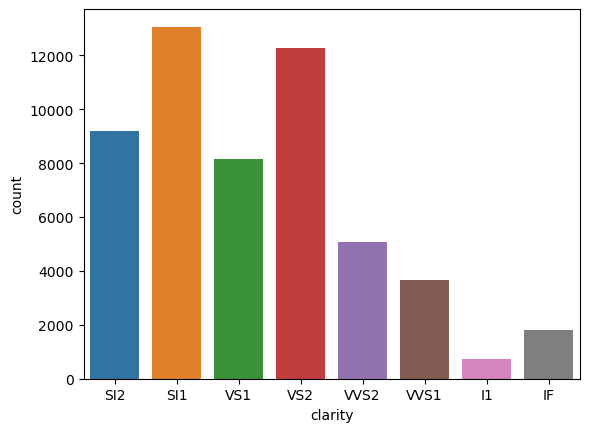

In [138]:
sns.countplot(x="clarity",data=df)
'''Most of the Diamonds come under the mediocre clarity range (in the dataset)'''

### VISUALISATION

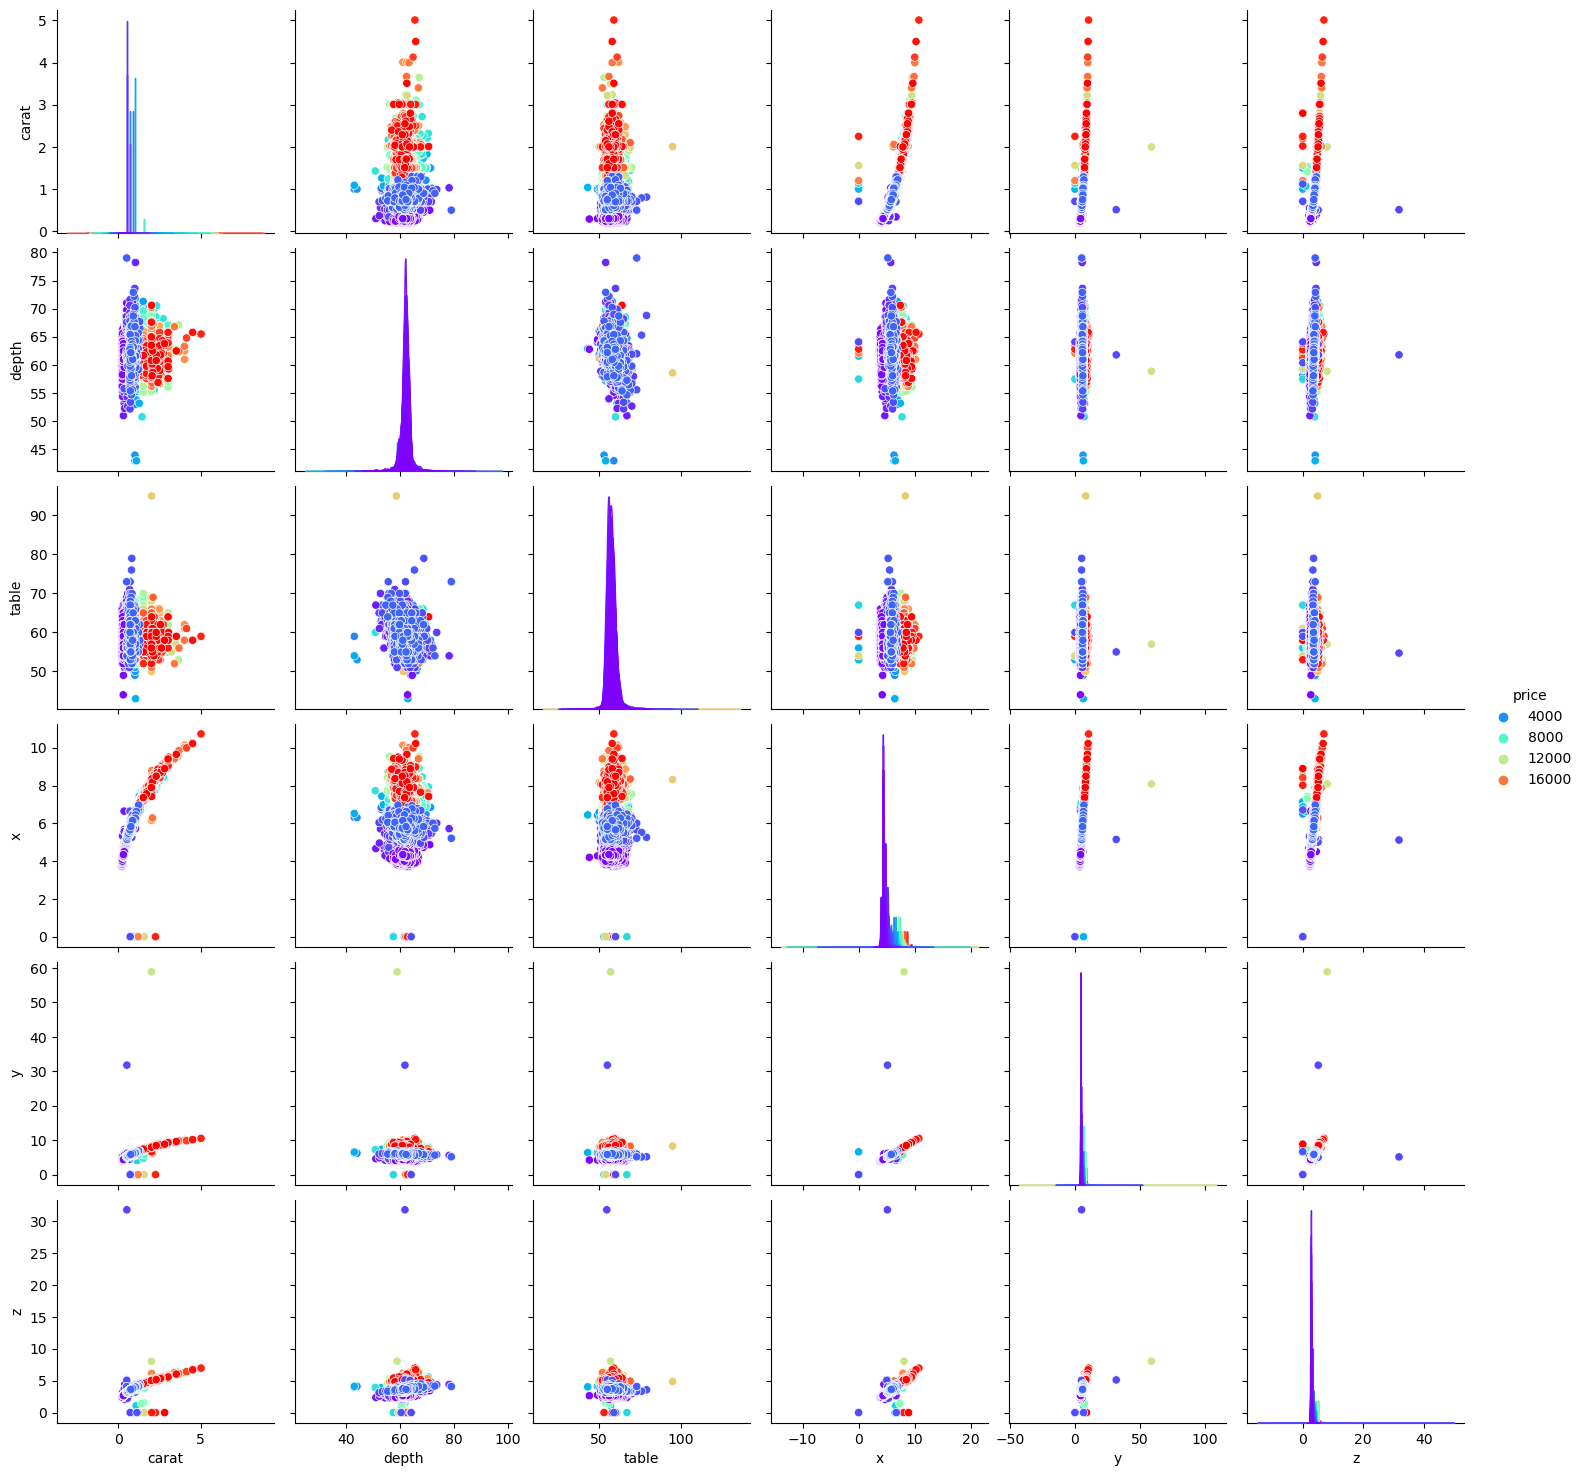

In [27]:
sns.pairplot(hue="price",data=df,palette="rainbow")

#### CARAT -V- PRICE (of highest clarity diamonds)

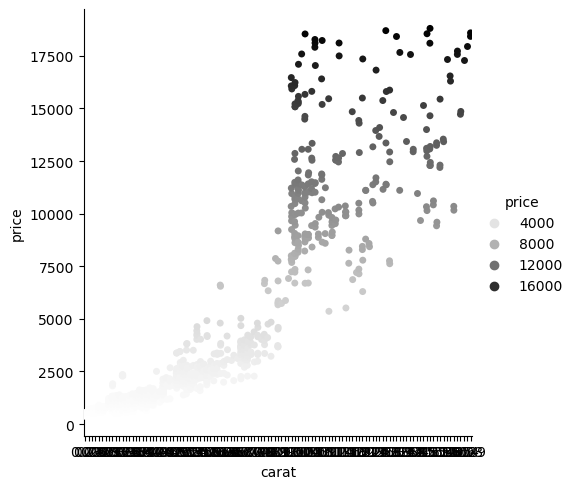

In [28]:
sns.catplot(y='price',x='carat',data=IF,hue="price",palette="Greys")

#### CLARITY -V- PRICE

<Axes: xlabel='clarity', ylabel='price'>

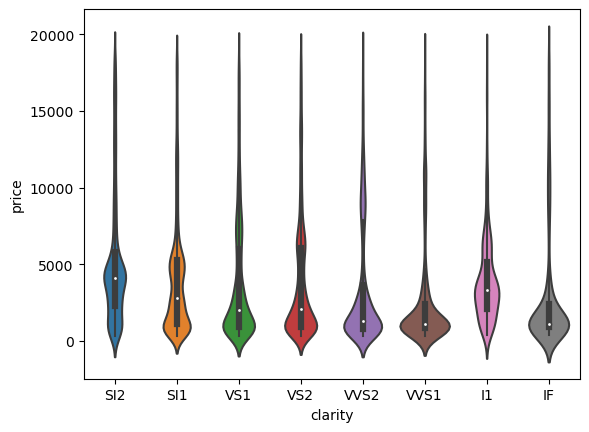

In [14]:
sns.violinplot(y="price",x="clarity",data=df)

#### IF (best clarity) - I1 (worst clarity) COMPARO

'A comparission between the diamonds with the best and the worst clarity'

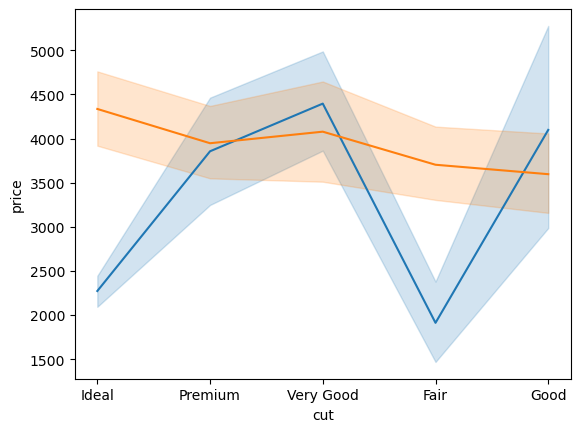

In [30]:
sns.lineplot(y='price',x='cut',data=IF)
sns.lineplot(y='price',x='cut',data=I1)
'''A comparission between the diamonds with the best and the worst clarity'''

#### PRICE- V- COLOUR (based on clarity)

'According to the graph plotted the colour of the diamond does not resonate much on the price of the high clarity diamonds '

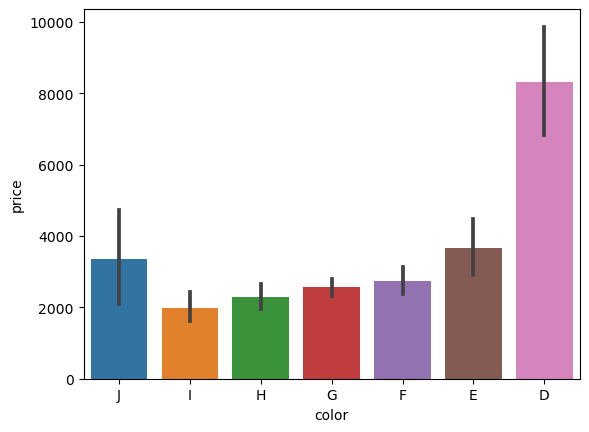

In [38]:
o=IF.sort_values(by='color',ascending=False)
sns.barplot(x='color',y='price',data=o)  #j being the worst and d being the best color
"""According to the graph plotted the colour of the diamond does not resonate much on the price of the high clarity diamonds """

'But same is not the case with low quality diamonds , mostly best colours have a high price'

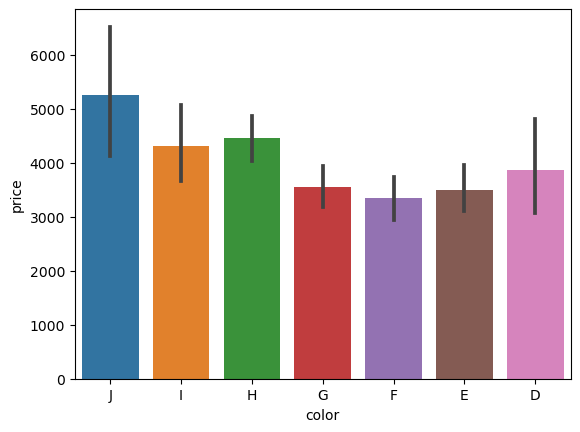

In [39]:
o=I1.sort_values(by='color',ascending=False)
sns.barplot(x='color',y='price',data=o)  #j being the worst and d being the best color
"""But same is not the case with low quality diamonds , mostly best colours have a high price"""

#### CUT- V -PRICE

<Axes: xlabel='cut', ylabel='price'>

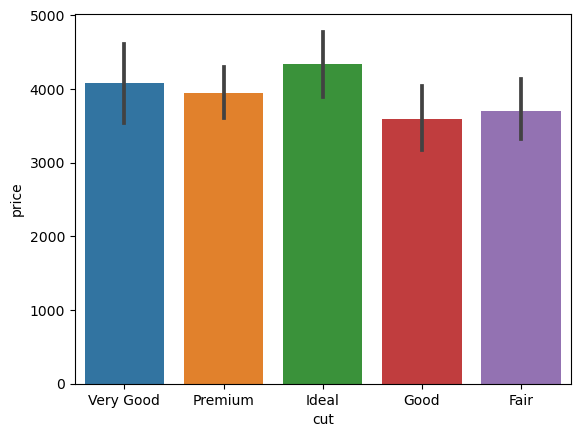

In [34]:
d=I1.sort_values(by='cut',ascending=False)
sns.barplot(x='cut',y='price',data=d)  

#### CLARITY -V- PRICE

<Axes: xlabel='clarity', ylabel='price'>

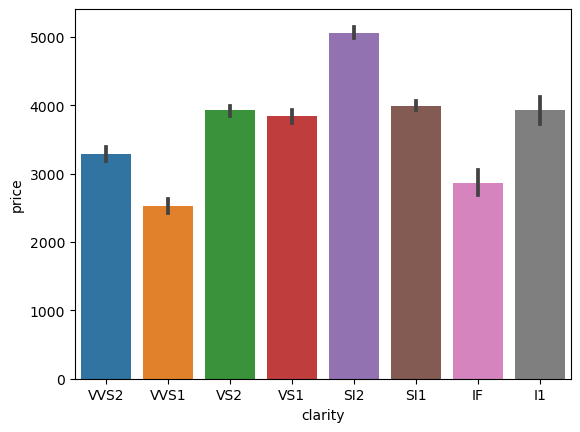

In [39]:
j=df.sort_values(by='clarity',ascending=False)
sns.barplot(x='clarity',y='price',data=j)  

#### CARAT -V- PRICE

<Axes: xlabel='carat', ylabel='price'>

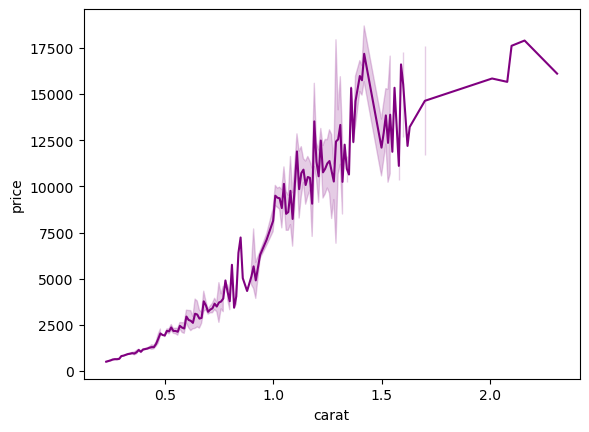

In [43]:
oa=clr.sort_values(by='carat',ascending=False)
sns.lineplot(x='carat',y='price',data=oa,color="purple")  

#### DEPTH -V- PRICE

<Axes: xlabel='depth', ylabel='price'>

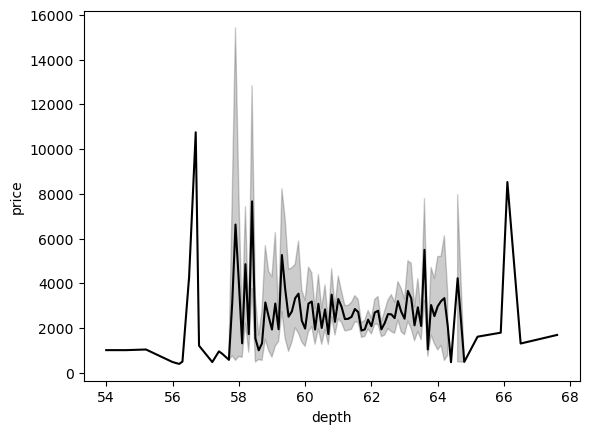

In [46]:
od=clr.sort_values(by='depth',ascending=False)
sns.lineplot(x='depth',y='price',data=od,color="black")  

#### TABLE -V- PRICE

<Axes: xlabel='table', ylabel='price'>

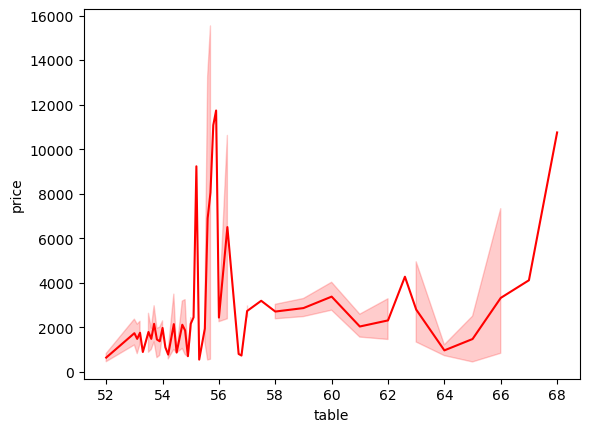

In [50]:
ot=clr.sort_values(by='table',ascending=False)
sns.lineplot(x='table',y='price',data=ot,color='r')  

#### DIMENSIONS (X,Y,Z) -V- PRICE 

##### X

<Axes: xlabel='x', ylabel='price'>

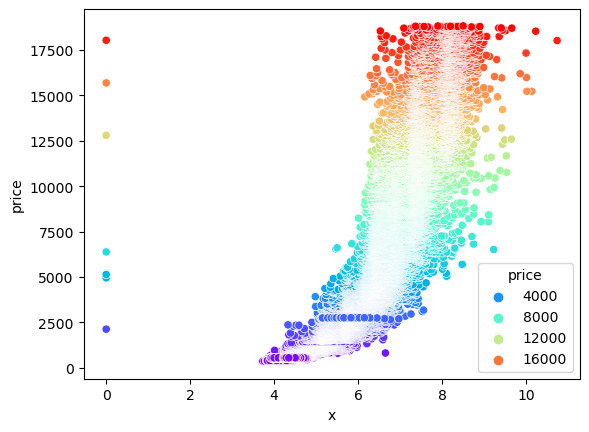

In [53]:
sns.scatterplot(x="x",y="price",data=df,hue="price",palette="rainbow")

##### Y

<Axes: xlabel='y', ylabel='price'>

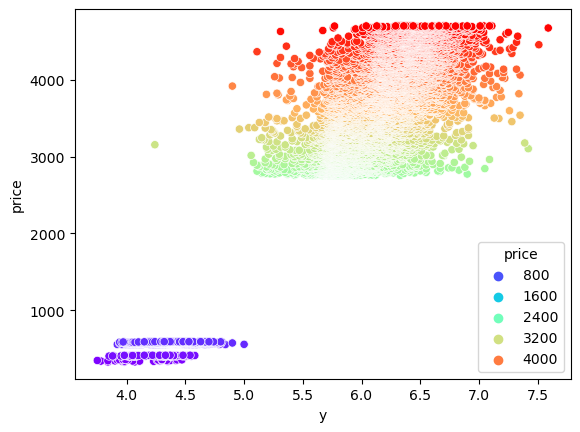

In [61]:
dh=df.head(10000)
sns.scatterplot(x="y",y="price",data=dh,hue="price",palette="rainbow")

##### Z

<Axes: xlabel='z', ylabel='price'>

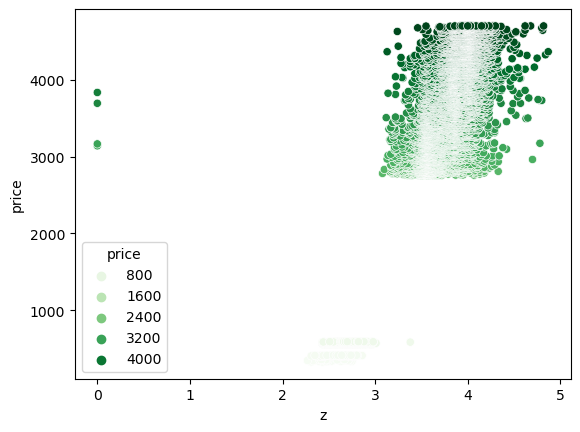

In [57]:
dh=df.head(10000)
sns.scatterplot(x="z",y="price",data=dh,hue="price",palette="Greens")

## DATA PREPROCESSING

In [61]:
df.isnull().sum().sum()

0

In [62]:
df.duplicated().sum().sum()

0

In [63]:
df.drop_duplicates(inplace= True)

In [64]:
df.duplicated().sum().sum()

0

In [65]:
lb=LabelEncoder()

In [66]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [67]:
df['color']=lb.fit_transform(df['color'])
df['cut']=lb.fit_transform(df['cut'])
df['clarity']=lb.fit_transform(df['clarity'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


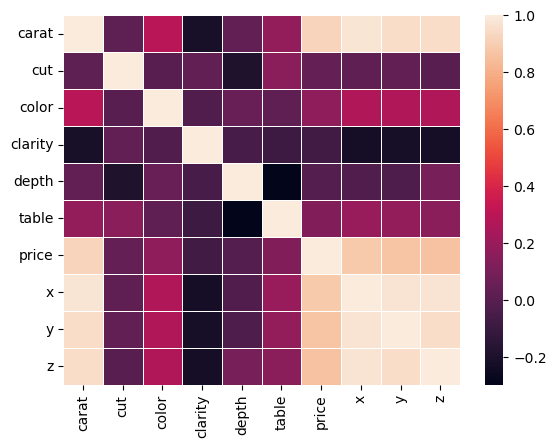

In [68]:
sns.heatmap(df.corr(),cbar=True,linewidth=0.5)
plt.show() #to identify correlations between different features.

## MODEL BUILDING ( PREDICTION)

In [69]:
df # here we take  the target value as price and rest as features

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [70]:
y=df.iloc[:,6].values
y

array([ 326,  326,  327, ..., 2757, 2757, 2757], dtype=int64)

In [71]:
x=df.iloc[:,[1,2,3,4,5,7,8,9]].values
x

array([[2.  , 1.  , 3.  , ..., 3.95, 3.98, 2.43],
       [3.  , 1.  , 2.  , ..., 3.89, 3.84, 2.31],
       [1.  , 1.  , 4.  , ..., 4.05, 4.07, 2.31],
       ...,
       [4.  , 0.  , 2.  , ..., 5.66, 5.68, 3.56],
       [3.  , 4.  , 3.  , ..., 6.15, 6.12, 3.74],
       [2.  , 0.  , 3.  , ..., 5.83, 5.87, 3.64]])

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
x_train

array([[2.  , 0.  , 5.  , ..., 4.47, 4.53, 2.79],
       [2.  , 0.  , 3.  , ..., 8.36, 8.31, 5.18],
       [2.  , 1.  , 5.  , ..., 5.24, 5.3 , 3.16],
       ...,
       [2.  , 6.  , 2.  , ..., 4.39, 4.42, 2.72],
       [3.  , 6.  , 2.  , ..., 6.13, 6.03, 3.82],
       [3.  , 3.  , 4.  , ..., 6.36, 6.31, 3.97]])

In [74]:
x_test

array([[0.  , 6.  , 5.  , ..., 5.63, 5.53, 3.62],
       [4.  , 1.  , 3.  , ..., 6.14, 6.18, 3.76],
       [2.  , 3.  , 4.  , ..., 5.3 , 5.33, 3.3 ],
       ...,
       [2.  , 2.  , 6.  , ..., 4.41, 4.43, 2.72],
       [3.  , 1.  , 5.  , ..., 7.31, 7.39, 4.58],
       [3.  , 1.  , 6.  , ..., 4.48, 4.44, 2.81]])

In [75]:
y_test

array([ 1435,  3584,  1851, ...,   912, 15002,  1071], dtype=int64)

In [76]:
#The given model follows regression so to test the model fit we will check Linear Regression, Support Vector Regression, Decision Tree Regression, Random Forest Regression

##### LINEAR REGRESSION

In [77]:
rgsr=LinearRegression()
rgsr.fit(x_train,y_train)

LinearRegression()

In [78]:
trainpredrgsr=rgsr.predict(x_train)
trainpredrgsr

array([  687.01815334, 12988.76165994,  2861.27232394, ...,
       -1627.51293086,  4039.70169806,  6066.96692663])

In [79]:
testpredrgsr=rgsr.predict(x_test)
testpredrgsr

array([3449.55685445, 5354.86664981, 2540.65474999, ...,  324.16583837,
       9960.02597656,  666.04358446])

In [80]:
#accuracy score

In [81]:
trainscorergsr=rgsr.score(x_train,y_train)
trainscorergsr

0.8071835928482732

In [82]:
testscorergsr=rgsr.score(x_test,y_test)
testscorergsr

0.8096083047159759

In [83]:
print ("MAE:",metrics.mean_absolute_error(y_test,testpredrgsr))

MAE: 1290.5585818779282


##### DECISION TREE

In [84]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
trainpreddtr=dtr.predict(x_train)
trainpreddtr

array([  829., 16558.,  1721., ...,   384.,  2871.,  6335.])

In [86]:
testpreddtr=dtr.predict(x_test)
testpreddtr

array([ 1659.,  4593.,  1851., ...,   867., 14171.,  1044.])

In [87]:
#accuracy score

In [88]:
trainscoredtr=dtr.score(x_train,y_train)
trainscoredtr

0.9999932097886449

In [89]:
testscoredtr=dtr.score(x_test,y_test)
testscoredtr

0.9641353400347157

##### RANDOM FOREST REGRESSOR

In [90]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
trainpredrfr=rfr.predict(x_train)
trainpredrfr

array([  810.24, 16741.12,  1721.47, ...,   398.57,  2861.63,  6303.44])

In [92]:
testpredrfr=rfr.predict(x_test)
testpredrfr

array([ 1782.57 ,  3707.498,  1866.93 , ...,   880.1  , 14434.09 ,
        1034.01 ])

In [93]:
#accuracy score

In [94]:
trainscorerfr=rfr.score(x_train,y_train)
trainscorerfr

0.9971070695456066

In [95]:
testscorerfr=rfr.score(x_test,y_test)
testscorerfr

0.9806659998161777

##### SVR

In [96]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [97]:
trainpredsvr=svr.predict(x_train)
trainpredsvr

array([  796.69819678, 10064.37833568,  2510.32682124, ...,
        -541.84728003,  3718.11043382,  5042.42615298])

In [98]:
testpredsvr=svr.predict(x_test)
testpredsvr

array([3118.74863312, 4486.6596308 , 2401.2756363 , ...,  601.01547097,
       7962.71910918,  826.17670752])

In [99]:
#accuracy score

In [100]:
trainscoresvr=svr.score(x_train,y_train)
trainscoresvr

0.7400920400378062

In [101]:
testscoresvr=svr.score(x_test,y_test)
testscoresvr

0.7480699467487142

In [102]:
print ("MAE:",metrics.mean_absolute_error(y_test,testpredsvr))

MAE: 1159.861712898768


## CONCLUSION

In [118]:
g=pd.DataFrame({'accuracy':[testscorergsr,testscoredtr,testscorerfr,testscoresvr],
               "models":["LinearRegression","DecisionTree","RandomForest","SVR"]})


gg=g.sort_values(by="accuracy",ascending=True)

<Axes: xlabel='models', ylabel='accuracy'>

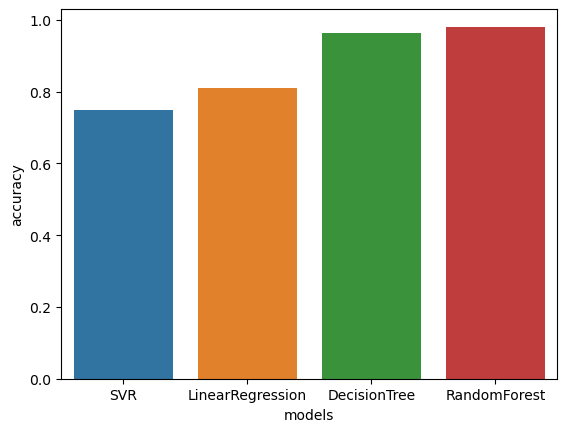

In [119]:
sns.barplot(x="models",y="accuracy",data=gg)

##### Here we can see than random forest classifier (98%) and decision tree (96%) have given the maximum accurracy in prediction